In [1]:
import pycountry

countrieRus=list(pycountry.subdivisions.get(country_code='RU'))
russiaSubjects= [x.name for x in countrieRus]
# print russiaCities


In [2]:
len(russiaSubjects)

83

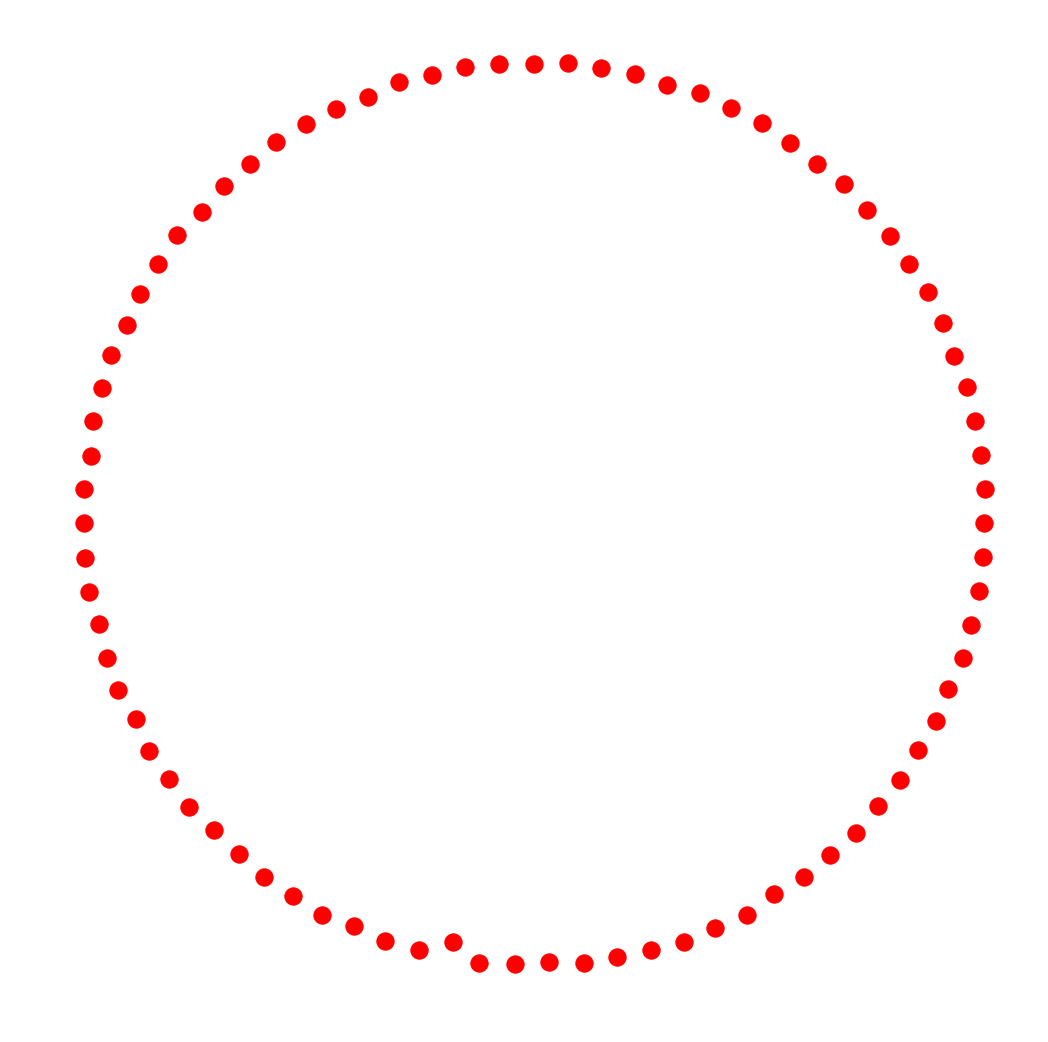

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

RUS = nx.Graph()
RUS.add_nodes_from(russiaSubjects)

plt.figure(figsize=(14,14))
nx.draw(RUS)
plt.show()